<a href="https://colab.research.google.com/github/JianHMai/Taxi-Tips-Prediction/blob/SVR/CPE695_Project_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv("TaxiTrip2021Subset.csv")

train = data.sample(frac=0.8)
test = data.drop(train.index).sample(frac=1.0)

In [134]:
trainX = train[['Trip Seconds', 'Trip Miles', 'Fare', 'Tips']]
trainY = train['Tips']
testX = test[['Trip Seconds', 'Trip Miles', 'Fare', 'Tips']]
testY = test['Tips']

In [135]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [136]:
svr_clf = make_pipeline(StandardScaler(), SVR())
svr_clf.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [137]:
svr_predY = svr_clf.predict(testX)
result = pd.DataFrame({"Fare": testX['Fare'], "Y Tips": testY, "Predicted": np.round(svr_predY,2)})
result

,Fare,Y Tips,Predicted
7559,7.25,1.45,1.35
3852,45.25,0.00,0.00
7926,8.75,0.00,-0.00
4640,14.00,0.00,-0.02
7879,4.25,0.00,0.06
...,...,...,...
1903,42.50,9.30,9.35
2356,10.25,0.00,-0.01
1433,29.50,0.00,0.03
6028,13.25,0.00,-0.01


In [138]:
rmse = mean_squared_error(testY, svr_predY, squared=False)
print("RMSE: " + "{:.2f}".format(rmse))

RMSE: 0.29


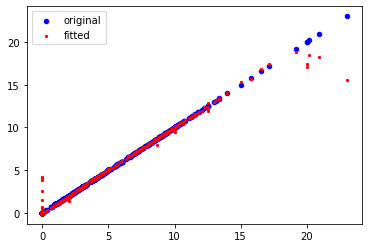

In [139]:
plt.scatter(testX['Tips'], testY, s=20, color="blue", label="original")
plt.scatter(testX['Tips'], svr_predY, s=5, color="red", label="fitted")
plt.legend()
plt.show()